# Predicting if Hand Guesture is a Fist
The dataset associated with this project is from kaggle (https://www.kaggle.com/kyr7plus/emg-4). The data is a reading of muscle activity in peoples' forearms while they made four different hand guestures, either rock, paper, scissors, or an okay sign. We appeded all the data into one file, then transformed it so the target variable was a 1 if the person was making a fist and zero otherwise. The code below attempts to predict if the person was making a fist or not.

##### First, import data manipulation tools

In [5]:
import pandas as pd
import numpy as np

##### Then process the data
Import it into a Panda's dataframe. The code below requires downloading the dataset.

In [17]:
df = pd.read_csv('Path-To-Hand_Guestures')

In [7]:
nrows = df.count()
print(nrows)

V1     11678
V2     11678
V3     11678
V4     11678
V5     11678
       ...  
V61    11678
V62    11678
V63    11678
V64    11678
V65    11678
Length: 65, dtype: int64


In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65
0,26,4,5,8,-1,-13,-109,-66,-9,2,...,-28,61,4,8,5,4,-7,-59,16,1
1,-47,-6,-5,-7,13,-1,35,-10,10,-4,...,-25,47,6,6,5,13,21,111,15,1
2,-19,-8,-8,-8,-21,-6,-79,12,0,5,...,-83,7,7,1,-8,7,21,114,48,1
3,2,3,0,2,0,22,106,-14,-16,-2,...,-38,-11,4,7,11,33,39,119,43,1
4,6,0,0,-2,-14,10,-51,5,7,0,...,38,-35,-8,2,6,-13,-24,-112,-69,1


##### Train, Test Split
It is important to create a train, test split on the data. This way we can train our model then evaluate its performance. By including the random_state parameter in the function the results of the models will be replicable.

In [9]:
X = df.iloc[:, 0:64]
y = df['V65']
X = np.array(X)
y = np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

##### Preproccessing
Luckily, this dataset does not need much preproccessing. The only thing it really needs is to be scaled. By scaling the data we are ensuring that variation inside of features are being accounted for equally. We have many options to feature engineer from this step, but forewent that for this project. It seems even without the data transformations our models performed well.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

##### Choosing Models
In this next step we define the models to run and their hyperparameters.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifiers = [
    LogisticRegression(random_state = 42),
    DecisionTreeClassifier(random_state = 42, min_samples_leaf = 10),
    RandomForestClassifier(random_state = 42, min_samples_leaf = 10),
    KNeighborsClassifier(),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 800, random_state=1),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=42)
]

##### Fitting Models
Here we fit and evaluate the models. Metrics we are reporting on are:
* Model Score
* Average Precision Score
* Roc AUC Score
* Precision Recall AUC
* 10 Most Predictive Features

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from eli5.formatters.as_dataframe import explain_weights_df

C:\Users\Seth Grossman\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Seth Grossman\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.793
average precision score: 0.555
roc_auc_score: 0.601
precision-recall AUC: 0.555

10 Most Predictive Features
  feature    weight
0     x23  0.181031
1     x31  0.171829
2     x13  0.142453
3     x29  0.138993
4     x45  0.132109
5     x39  0.119345
6     x53  0.111918
7     x21  0.110538
8     x15  0.107028
9     x37  0.099581



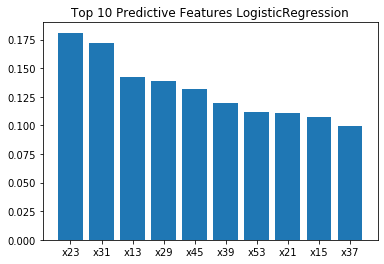


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
model score: 0.948
average precision score: 0.915
roc_auc_score: 0.967
precision-recall AUC: 0.944

10 Most Predictive Features
  feature    weight
0     x30  0.545616
1     x38  0.125713
2     x46  0.073144
3     x54  0.043209
4     x29  0.038881
5     x62  0.026360
6     x45  0.021909
7     x53  0.018536
8     x22  0.018205
9     x21  0.016608



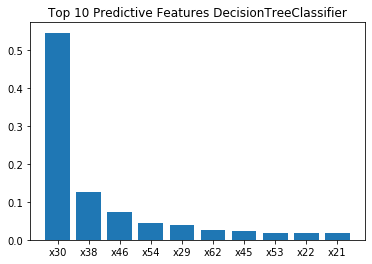


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
model score: 0.971
average precision score: 0.990
roc_auc_score: 0.996
precision-recall AUC: 0.990

10 Most Predictive Features
  feature    weight
0     x30  0.121882
1     x62  0.119332
2      x6  0.111696
3     x38  0.107103
4     x46  0.102759
5     x54  0.097913
6     x14  0.097106
7     x22  0.076027
8     x35  0.011714
9     x43  0.009549



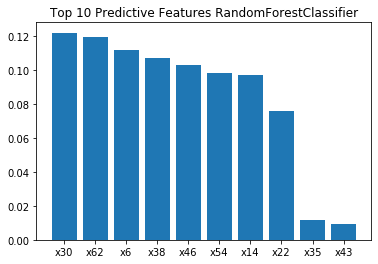


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.878
average precision score: 0.839
roc_auc_score: 0.913
precision-recall AUC: 0.894

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
model score: 0.952
average precision score: 0.967
roc_auc_score: 0.983
precision-recall AUC: 0.968

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
          

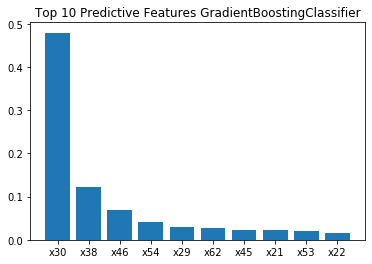

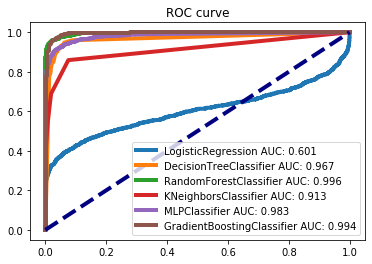

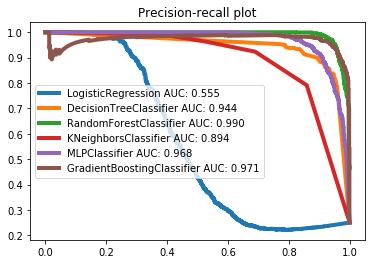

In [20]:
np.random.seed(42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', None)])
roc_things = []
precision_recall_things = []

for classifier in classifiers:
    clf.set_params(clf=classifier).fit(X_train, y_train)
    classifier_name = classifier.__class__.__name__
    print(str(classifier))
    print("model score: %.3f" % clf.score(X_test, y_test))
    
    
    y_score = np.array(clf.predict_proba(X_test)[:,1])
    roc_auc = roc_auc_score(y_test, y_score)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_things.append((fpr, tpr, '{} AUC: {:.3f}'.format(classifier_name, roc_auc)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    precision_recall_things.append((recall, precision, thresholds, '{} AUC: {:.3f}'.format(classifier_name, pr_auc)))
    
    print('average precision score: {:.3f}'.format(average_precision_score(y_test, y_score)))
    print('roc_auc_score: {:.3f}'.format(roc_auc))
    print('precision-recall AUC: {:.3f}'.format(pr_auc))
    print()
    try:
        importances = explain_weights_df(classifier)
        weights_df = importances[:10][['feature','weight']]
        print('10 Most Predictive Features')
        print(weights_df)
        print()
        plt.bar(x = weights_df['feature'], height = weights_df['weight'])
        plt.title('Top 10 Predictive Features ' + str(classifier).split('(')[0])
        plt.show()
        print()
    except:
        pass
    
roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend()
plt.title('ROC curve')
          
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw, label=label)
plt.title('Precision-recall plot')
plt.legend()

##### Optimize F1
Last, the model that performed the best in terms of precision recall was the Random Forest. In order to find F1 score of the Random Forest we can run the code below. The F1 score is just a weighted average of the precision and recall. It attempts to find a balance between the two metrics.

In [15]:
from scipy.stats import hmean
import numpy.ma as ma

recall, precision, thresholds, _ = precision_recall_things[2]

a = np.column_stack((recall,precision))

a = ma.masked_less_equal(a, 0)
a = ma.mask_rows(a)
f1 = hmean(a,axis=1)

threshold_that_maximizes_f1 = thresholds[np.argmax(f1)]
print('threshold that optimizes f1: {}'.format(threshold_that_maximizes_f1))

threshold that optimizes f1: 0.6044107039930562
